In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [3]:
ls 'data'

X_test.csv  Xy_train.csv


In [4]:
df_raw = pd.read_csv('data/Xy_train.csv', delimiter=',')
df_raw

,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507
3,6.762547,3.108068
4,3.911096,4.225744
...,...,...
95,3.787495,5.133706
96,2.759471,4.308327
97,9.661041,11.923565
98,0.582026,1.335725


In [5]:
res = pd.DataFrame({'model':[], 'r2':[] , 'mean squared error': []})

In [6]:
df_raw.isnull().sum()

X    0
y    0
dtype: int64

In [7]:
df_raw.X

0     2.273360
1     3.167583
2     7.973655
3     6.762547
4     3.911096
        ...   
95    3.787495
96    2.759471
97    9.661041
98    0.582026
99    4.087339
Name: X, Length: 100, dtype: float64

In [8]:
df_raw.describe()

,X,y
count,100.000000,100.000000
mean,4.534694,5.073047
std,2.734487,2.398315
min,0.050223,-0.259323
25%,2.415300,3.735343
50%,3.999217,4.670649
75%,6.686171,5.761732
max,9.728298,13.930549


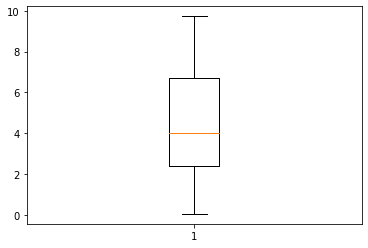

In [9]:
plt.boxplot(df_raw.X)
plt.show()

## Separo en train y validation

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(df_raw.X, df_raw.y, test_size=0.2, random_state=1)
xtrain = np.array(xtrain).reshape(-1,1)
xtest = np.array(xtest).reshape(-1,1)

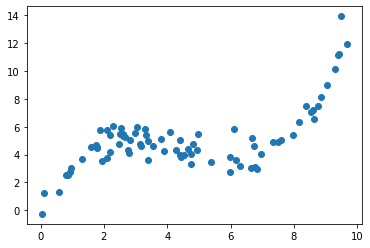

In [11]:
plt.scatter(xtrain, ytrain)
plt.show()

## Creo unos primeros modelos para ver cual es mi baseline en cuestion de Mean Squared Error

In [12]:
lr = LinearRegression(n_jobs=4)
lr.fit(xtrain, ytrain)
r2_score(ytest, lr.predict(xtest)), mean_squared_error(ytest, lr.predict(xtest))

(0.3134111868879067, 5.379886011391579)

In [13]:
res = res.append({'model':'Linear Reg',
            'r2':r2_score(ytest, lr.predict(xtest)),
            'mean squared error':mean_squared_error(ytest, lr.predict(xtest))},
           ignore_index=True)

In [14]:
r = Ridge()
r.fit(xtrain, ytrain)
r2_score(ytest, r.predict(xtest)), mean_squared_error(ytest, r.predict(xtest))

(0.3134031972643121, 5.379948615476283)

In [15]:
res = res.append({'model':'Ridge Reg',
            'r2':r2_score(ytest, r.predict(xtest)),
            'mean squared error':mean_squared_error(ytest, r.predict(xtest))},
           ignore_index=True)

In [16]:
svr = SVR()
svr.fit(xtrain, ytrain)
r2_score(ytest, svr.predict(xtest)), mean_squared_error(ytest, svr.predict(xtest))

(0.746096476231106, 1.989505202649277)

In [17]:
res = res.append({'model':'SVR',
            'r2':r2_score(ytest, svr.predict(xtest)),
            'mean squared error':mean_squared_error(ytest, svr.predict(xtest))},
           ignore_index=True)

In [18]:
knr = KNeighborsRegressor(n_jobs=4)
knr.fit(xtrain, ytrain)
r2_score(ytest, knr.predict(xtest)), mean_squared_error(ytest, knr.predict(xtest))

(0.8630267111574106, 1.0732780180882988)

In [19]:
res = res.append({'model':'KNR',
            'r2':r2_score(ytest, knr.predict(xtest)),
            'mean squared error':mean_squared_error(ytest, knr.predict(xtest))},
           ignore_index=True)

In [20]:
rf = RandomForestRegressor(n_jobs=4)
rf.fit(xtrain, ytrain)
r2_score(ytest, rf.predict(xtest)), mean_squared_error(ytest, rf.predict(xtest))

(0.8748211496018412, 0.9808606451459699)

In [21]:
res = res.append({'model':'RF',
            'r2':r2_score(ytest, rf.predict(xtest)),
            'mean squared error': mean_squared_error(ytest, rf.predict(xtest))},
           ignore_index=True)

In [22]:
res

,model,r2,mean squared error
0,Linear Reg,0.313411,5.379886
1,Ridge Reg,0.313403,5.379949
2,SVR,0.746096,1.989505
3,KNR,0.863027,1.073278
4,RF,0.874821,0.980861


## Pruebo lo mismo con los datos escalados

In [23]:
scaler = StandardScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

In [24]:
lr = LinearRegression(n_jobs=4)
lr.fit(xtrain_scal, ytrain)
r2_score(ytest, lr.predict(xtest_scal)), mean_squared_error(ytest, lr.predict(xtest_scal))

(0.3134111868879067, 5.379886011391578)

In [25]:
res = res.append({'model':'Linear Reg Scal',
            'r2':r2_score(ytest, lr.predict(xtest_scal)),
            'mean squared error':mean_squared_error(ytest, lr.predict(xtest_scal))},
           ignore_index=True)

In [26]:
r = Ridge()
r.fit(xtrain_scal, ytrain)
r2_score(ytest, r.predict(xtest_scal)), mean_squared_error(ytest, r.predict(xtest_scal))

(0.31331354226327834, 5.380651122823769)

In [27]:
res = res.append({'model':'Ridge Reg Scal',
            'r2':r2_score(ytest, r.predict(xtest_scal)),
            'mean squared error':mean_squared_error(ytest, r.predict(xtest_scal))},
           ignore_index=True)

In [28]:
svr = SVR()
svr.fit(xtrain_scal, ytrain)
r2_score(ytest, svr.predict(xtest_scal)), mean_squared_error(ytest, svr.predict(xtest_scal))

(0.746096476231106, 1.9895052026492774)

In [29]:
res = res.append({'model':'SVR Scal',
            'r2':r2_score(ytest, svr.predict(xtest_scal)),
            'mean squared error':mean_squared_error(ytest, svr.predict(xtest_scal))},
           ignore_index=True)

In [30]:
knr = KNeighborsRegressor(n_jobs=4)
knr.fit(xtrain_scal, ytrain)
r2_score(ytest, knr.predict(xtest_scal)), mean_squared_error(ytest, knr.predict(xtest_scal))

(0.8630267111574106, 1.0732780180882988)

In [31]:
res = res.append({'model':'KNR Scal',
            'r2':r2_score(ytest, knr.predict(xtest_scal)),
            'mean squared error': mean_squared_error(ytest, knr.predict(xtest_scal))},
           ignore_index=True)

In [32]:
rf = RandomForestRegressor(n_jobs=4)
rf.fit(xtrain_scal, ytrain)
r2_score(ytest, rf.predict(xtest_scal)), mean_squared_error(ytest, rf.predict(xtest_scal))

(0.8801174549249625, 0.939360524002477)

In [33]:
res = res.append({'model':'RF Scal',
            'r2':r2_score(ytest, rf.predict(xtest_scal)),
            'mean squared error': mean_squared_error(ytest, rf.predict(xtest_scal))},
           ignore_index=True)

In [34]:
res.sort_values('mean squared error')

,model,r2,mean squared error
9,RF Scal,0.880117,0.939361
4,RF,0.874821,0.980861
3,KNR,0.863027,1.073278
8,KNR Scal,0.863027,1.073278
2,SVR,0.746096,1.989505
7,SVR Scal,0.746096,1.989505
5,Linear Reg Scal,0.313411,5.379886
0,Linear Reg,0.313411,5.379886
1,Ridge Reg,0.313403,5.379949
6,Ridge Reg Scal,0.313314,5.380651


Dado que el rango de valores no variaba mucho el escalado no modifico mucho los datos y no se notan cambios en los resultados

### Pruebo agregando features polinomicas escaladas

In [35]:
poly = PolynomialFeatures(3, include_bias=False)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

scaler = StandardScaler().fit(xtrain_poly)

xtrain_poly = scaler.transform(xtrain_poly)
xtest_poly = scaler.transform(xtest_poly)

In [36]:
lr = LinearRegression(n_jobs=4)
lr.fit(xtrain_poly, ytrain)
r2_score(ytest, lr.predict(xtest_poly)), mean_squared_error(ytest, lr.predict(xtest_poly))

(0.9150615568475722, 0.6655499382139245)

In [37]:
res = res.append({'model':'Linear Reg Poly',
            'r2':r2_score(ytest, lr.predict(xtest_poly)),
            'mean squared error':mean_squared_error(ytest, lr.predict(xtest_poly))},
           ignore_index=True)

In [38]:
r = Ridge()
r.fit(xtrain_poly, ytrain)
r2_score(ytest, r.predict(xtest_poly)), mean_squared_error(ytest, r.predict(xtest_poly))

(0.6078370007471581, 3.072861359774709)

In [39]:
res = res.append({'model':'Ridge Reg Poly',
            'r2':r2_score(ytest, r.predict(xtest_poly)),
            'mean squared error':mean_squared_error(ytest, r.predict(xtest_poly))},
           ignore_index=True)

In [40]:
svr = SVR()
svr.fit(xtrain_poly, ytrain)
r2_score(ytest, svr.predict(xtest_poly)), mean_squared_error(ytest, svr.predict(xtest_poly))

(0.7625767964410979, 1.8603707884733296)

In [41]:
res = res.append({'model':'SVR Poly',
            'r2':r2_score(ytest, svr.predict(xtest_poly)),
            'mean squared error':mean_squared_error(ytest, svr.predict(xtest_poly))},
           ignore_index=True)

In [42]:
knr = KNeighborsRegressor(n_jobs=4)
knr.fit(xtrain_poly, ytrain)
r2_score(ytest, knr.predict(xtest_poly)), mean_squared_error(ytest, knr.predict(xtest_poly))

(0.8630267111574106, 1.0732780180882988)

In [43]:
res = res.append({'model':'KNR Poly',
            'r2':r2_score(ytest, knr.predict(xtest_poly)),
            'mean squared error': mean_squared_error(ytest, knr.predict(xtest_poly))},
           ignore_index=True)

In [44]:
rf = RandomForestRegressor(n_jobs=4)
rf.fit(xtrain_poly, ytrain)
r2_score(ytest, rf.predict(xtest_poly)), mean_squared_error(ytest, rf.predict(xtest_poly))

(0.8896104811059466, 0.8649762669602448)

In [45]:
res = res.append({'model':'RF Poly',
            'r2':r2_score(ytest, rf.predict(xtest_poly)),
            'mean squared error': mean_squared_error(ytest, rf.predict(xtest_poly))},
           ignore_index=True)

In [46]:
res.sort_values('mean squared error')

,model,r2,mean squared error
10,Linear Reg Poly,0.915062,0.665550
14,RF Poly,0.889610,0.864976
9,RF Scal,0.880117,0.939361
4,RF,0.874821,0.980861
3,KNR,0.863027,1.073278
8,KNR Scal,0.863027,1.073278
13,KNR Poly,0.863027,1.073278
12,SVR Poly,0.762577,1.860371
2,SVR,0.746096,1.989505
7,SVR Scal,0.746096,1.989505


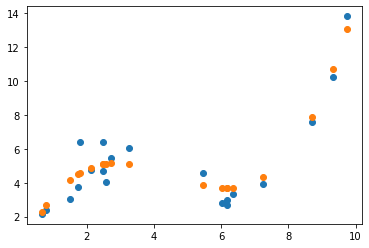

In [47]:
plt.scatter(xtest.reshape(1,-1)[0], ytest)
plt.scatter(xtest.reshape(1,-1)[0], lr.predict(xtest_poly))
plt.show()

## Analizo PCA con la feature original y las polinomiales tambien

In [48]:
n_comps = xtrain.shape[1]

pca = PCA(n_components= n_comps)

train_pca = pca.fit_transform(xtrain_scal)

test_pca = pca.transform(xtest_scal)

In [49]:
lr = LinearRegression(n_jobs=4)
lr.fit(train_pca, ytrain)
r2_score(ytest, lr.predict(test_pca)), mean_squared_error(ytest, lr.predict(test_pca))

(0.3134111868879067, 5.379886011391578)

In [50]:
res = res.append({'model':'Linear Reg PCA',
            'r2':r2_score(ytest, lr.predict(test_pca)),
            'mean squared error':mean_squared_error(ytest, lr.predict(test_pca))},
           ignore_index=True)

In [51]:
r = Ridge()
r.fit(train_pca, ytrain)
r2_score(ytest, r.predict(test_pca)), mean_squared_error(ytest, r.predict(test_pca))

(0.31331354226327823, 5.380651122823769)

In [52]:
res = res.append({'model':'Ridge Reg PCA',
            'r2':r2_score(ytest, r.predict(test_pca)),
            'mean squared error':mean_squared_error(ytest, r.predict(test_pca))},
           ignore_index=True)

In [53]:
svr = SVR()
svr.fit(train_pca, ytrain)
r2_score(ytest, svr.predict(test_pca)), mean_squared_error(ytest, svr.predict(test_pca))

(0.746096476231106, 1.989505202649278)

In [54]:
res = res.append({'model':'SVR PCA',
            'r2':r2_score(ytest, svr.predict(test_pca)),
            'mean squared error':mean_squared_error(ytest, svr.predict(test_pca))},
           ignore_index=True)

In [55]:
knr = KNeighborsRegressor(n_jobs=4)
knr.fit(train_pca, ytrain)
r2_score(ytest, knr.predict(test_pca)), mean_squared_error(ytest, knr.predict(test_pca))

(0.8630267111574106, 1.0732780180882988)

In [56]:
res = res.append({'model':'KNR PCA',
            'r2':r2_score(ytest, knr.predict(test_pca)),
            'mean squared error': mean_squared_error(ytest, knr.predict(test_pca))},
           ignore_index=True)

In [57]:
rf = RandomForestRegressor(n_jobs=4)
rf.fit(train_pca, ytrain)
r2_score(ytest, rf.predict(test_pca)), mean_squared_error(ytest, rf.predict(test_pca))

(0.8819648998617768, 0.9248845480142679)

In [58]:
res = res.append({'model':'RF PCA',
            'r2':r2_score(ytest, rf.predict(test_pca)),
            'mean squared error': mean_squared_error(ytest, rf.predict(test_pca))},
           ignore_index=True)

In [59]:
res.sort_values('mean squared error')

,model,r2,mean squared error
10,Linear Reg Poly,0.915062,0.665550
14,RF Poly,0.889610,0.864976
19,RF PCA,0.881965,0.924885
9,RF Scal,0.880117,0.939361
4,RF,0.874821,0.980861
8,KNR Scal,0.863027,1.073278
18,KNR PCA,0.863027,1.073278
13,KNR Poly,0.863027,1.073278
3,KNR,0.863027,1.073278
12,SVR Poly,0.762577,1.860371


## Analizo el mejor modelo

In [60]:
lr = LinearRegression()
lr.fit(xtrain_poly, ytrain)
r2_score(ytest, lr.predict(xtest_poly)),mean_squared_error(ytest, lr.predict(xtest_poly))

(0.9150615568475722, 0.6655499382139245)

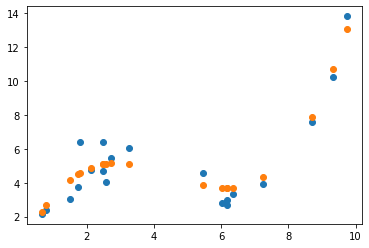

In [61]:
plt.scatter(xtest, ytest)
plt.scatter(xtest, lr.predict(xtest_poly))
plt.show()

### Una vez elegido el modelo lo re entreno con todo el dataset

In [62]:
poly = PolynomialFeatures(3, include_bias=False)
x = df_raw.X.to_numpy()

xtrain_poly = poly.fit_transform(x.reshape(-1,1))

scaler = StandardScaler().fit(xtrain_poly)

xtrain_poly = scaler.transform(xtrain_poly)

In [63]:
lr = LinearRegression()
lr.fit(xtrain_poly, df_raw.y)

LinearRegression()

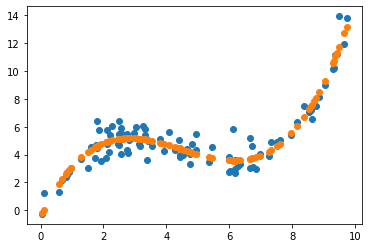

In [64]:
plt.scatter(df_raw.X, df_raw.y)
plt.scatter(df_raw.X, lr.predict(xtrain_poly))
plt.show()

## Importo el test set para calcular las salidas

In [65]:
df_test = pd.read_csv('data/X_test.csv', delimiter=',')

In [66]:
test_poly = poly.transform(df_test)

test = scaler.transform(test_poly)

In [67]:
ytestpred = (rf.predict(df_test) + lr.predict(test))/2
ytestpred

array([ 7.89525583,  7.89981307, 10.0124333 ,  8.64538923,  8.6937002 ,
        7.93244721,  9.64873208,  2.39445755, 10.96474489,  8.69144632,
        8.66607357,  7.91044072, 11.05738391,  2.86512375,  8.23142481,
        9.05600256,  8.13387351,  7.89973728,  8.1528852 ,  7.89848393])

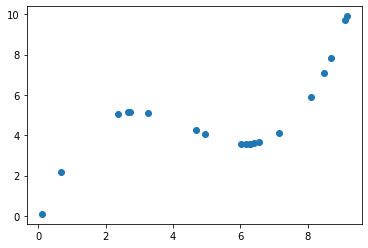

In [68]:
plt.scatter(df_test, lr.predict(test))
plt.show()